<a href="https://colab.research.google.com/github/rizzaesh/security-adversarioal-dos-attack/blob/main/WorkShit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
import joblib
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os     
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.cluster import KMeans #one with clusterimg (disaster)
from sklearn.model_selection import train_test_split


In [ ]:
# import dataset
dataset_benign = pd.read_csv("/content/drive/MyDrive/A/data 2 dos benign/benign_update_benign.csv")
dataset_ddos = pd.read_csv("/content/drive/MyDrive/A/data 2 dos benign/ddos_update_ddos.csv")
dataset = [dataset_ddos, dataset_benign]
data = pd.concat(dataset)


In [13]:
data.head()

,ip.src,ip.dst,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,ip.fragment.count,ip.fragments,ip.ttl,ip.proto,tcp.window_size,tcp.ack,tcp.seq,tcp.len,tcp.stream,tcp.urgent_pointer,tcp.flags,tcp.analysis.ack_rtt,tcp.segments,tcp.reassembled.length,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta,label
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,ddos
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.760596,4.760596,0.0,0.0,ddos
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.520528,4.759932,0.0,0.0,ddos
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.275339,4.754811,0.0,0.0,ddos
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.949292,4.673953,0.0,0.0,ddos


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251 entries, 0 to 1250
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ip.src                  3251 non-null   int64  
 1   ip.dst                  3251 non-null   int64  
 2   ip.len                  3251 non-null   float64
 3   ip.flags.df             3251 non-null   float64
 4   ip.flags.mf             3251 non-null   float64
 5   ip.fragment             3251 non-null   float64
 6   ip.fragment.count       3251 non-null   float64
 7   ip.fragments            3251 non-null   float64
 8   ip.ttl                  3251 non-null   float64
 9   ip.proto                3251 non-null   float64
 10  tcp.window_size         3251 non-null   float64
 11  tcp.ack                 3251 non-null   float64
 12  tcp.seq                 3251 non-null   float64
 13  tcp.len                 3251 non-null   float64
 14  tcp.stream              3251 non-null   

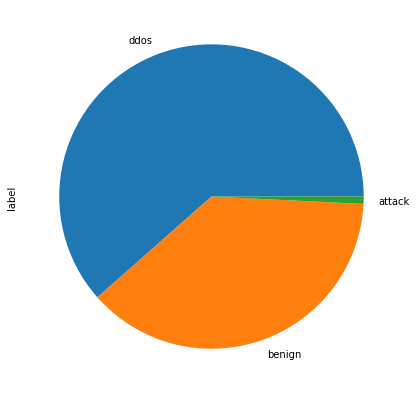

In [20]:
data['label'].value_counts().plot(kind = 'pie' , figsize = (7,7))

In [33]:
len(set(data['ip.fragments']))

1

In [ ]:
corr = data.corr()
corr

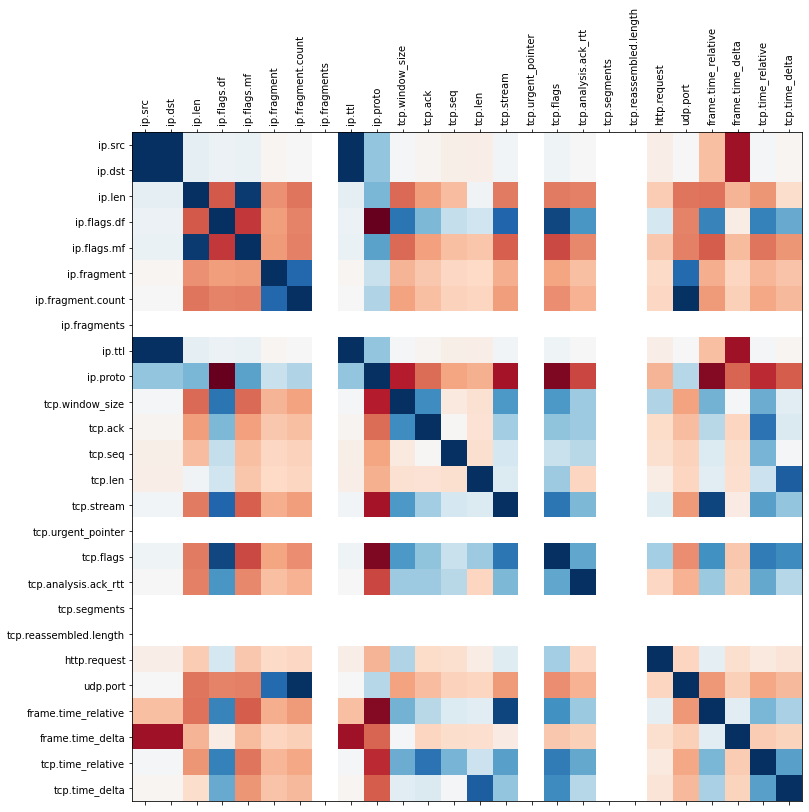

In [35]:
fig = plt.figure(figsize=(12,12))
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)),corr.columns, rotation = 'vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

In [36]:
X = data.drop('label',axis = 1)
# X
Y = data['label']
# Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [38]:
# We want to use LogisticRegression model to train the data:

clf = RandomForestClassifier()
# clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
Yt = np.array(Y_test)
prescision = 0
for i in range(len(Yt)):
  if Y_pred[i] == Yt[i]:
    prescision +=1
prescision/len(Yt)

0.977859778597786

In [43]:
kmean = KMeans(n_clusters = 3).fit(X_train)
label = kmean.predict(X_test)

In [45]:
labe = pd.DataFrame(label)

In [56]:
y_lab = pd.DataFrame(Y_test)

In [51]:
labe.value_counts()

0    622
2    153
1     38
dtype: int64

In [57]:
y_lab.value_counts()

label 
ddos      511
benign    295
attack      7
dtype: int64

In [65]:
y_labs = y_lab.groupby('label')

In [74]:
X.columns

Index(['ip.src', 'ip.dst', 'ip.len', 'ip.flags.df', 'ip.flags.mf',
       'ip.fragment', 'ip.fragment.count', 'ip.fragments', 'ip.ttl',
       'ip.proto', 'tcp.window_size', 'tcp.ack', 'tcp.seq', 'tcp.len',
       'tcp.stream', 'tcp.urgent_pointer', 'tcp.flags', 'tcp.analysis.ack_rtt',
       'tcp.segments', 'tcp.reassembled.length', 'http.request', 'udp.port',
       'frame.time_relative', 'frame.time_delta', 'tcp.time_relative',
       'tcp.time_delta'],
      dtype='object')

In [41]:
Yt = np.array(Y_test)
Y_pred = np.array(label)
prescision = 0
for i in range(len(Yt)):
  if Y_pred[i] == Yt[i]:
    prescision +=1
prescision/len(Yt)

0.0